Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/chapter04.ipynb)



# Setup

 - 모듈을 임포트하고, Matplotlib 그래프를 인라인으로 표시, 그래프를 저장하기 위한 함수 준비
 - Python 3.5 이상이 설치되어 있는지 확인
 - Scikit-Learn 0.20 이상이 설치되어 있는지도 함께 확인

In [5]:
# Python 3.5 이상이 필요함
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn 0.20 이상이 필요함
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 실행할 때마다 동일한 결과를 얻기 위해 난수 시드 고정
np.random.seed(42)

# 예쁜 그래프 출력을 위한 설정
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)     # 축 라벨 크기 설정
mpl.rc('xtick', labelsize=12)    # x축 눈금 라벨 크기 설정
mpl.rc('ytick', labelsize=12)    # y축 눈금 라벨 크기 설정

# 그래프 파일을 저장할 위치 설정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)  # 디렉토리가 없으면 생성

# 그래프를 저장하는 함수 정의
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Linear Regression

1장) 삶의 만족도에 대한 간단한 회귀 모델

life_satisfaction = θ₀ + θ₁ × GDP_per_capita

이 모델은 입력 특성인 GDP_per_capita에 대한 선형 함수일 뿐이며, θ₀와 θ₁은 모델의 파라미터  
선형 모델은 입력 특성들의 가중합에 편향 항(상수)를 더해 예측을 수행함

ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ⋯ + θₙxₙ

 - ŷ: 예측된 값
 - n: 특성의 개수
 - xᵢ: i번째 특성 값
 - θⱼ: j번째 모델 파라미터(편향 항 θ₀와 특성 가중치 θ₁, θ₂, ⋯, θₙ 포함)

벡터 형태로 훨씬 간결하게 표현

$\hat{y} = h_{\theta}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}$


- θ: 모델의 파라미터 벡터로, 편향 항 θ₀과 특성 가중치 θ₁부터 θₙ까지 포함
- x: 하나의 샘플에 대한 특성 벡터로, x₀부터 xₙ까지를 포함하며, x₀는 항상 1
- θ · x: 벡터 θ와 x의 내적(dot product)이며 θ₀x₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ과 같음
-  $h_{\theta}$는 모델 파라미터 θ를 사용한 가설 함수(hypothesis function)

벡터를 종종 열 벡터(column vector)로 표현: 하나의 열을 가진 2차원 배열
θ와 x가 열 벡터라면 예측은 ŷ = θᵀx로 표현되며, θᵀ는 θ의 전치 행렬(행 벡터)
이때 θᵀx는 θᵀ와 x의 행렬 곱이며, 결과는 스칼라 값이 아닌 단일 셀을 가진 행렬로 표현됨

모델을 학습시킨다는 것 -> 모델이 훈련 세트에 가장 잘 맞도록 그 파라미터를 설정

이를 위해서는 먼저 모델이 훈련 데이터에 얼마나 잘(혹은 못) 맞는지를 측정할 수 있는 척도가 필요

2장에서 회귀 모델의 가장 일반적인 성능 측정 지표가 평균 제곱근 오차(RMSE)임을 확인함  
따라서 **선형 회귀 모델을 학습시키기 위해서는 RMSE를 최소화하는 θ 값을 찾아야 함**

실제로는 RMSE보다 MSE를 최소화하는 것이 더 간단하며 같은 결과임(어떤 함수를 최소화하는 값은 그 제곱근도 최소화하기 때문)

선형 회귀 가설 ℎ𝜃의 훈련 세트 𝑋에 대한 평균 제곱 오차(MSE)

$$
\mathrm{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^\top \mathbf{x}^{(i)} - y^{(i)} \right)^2
$$


표기를 단순하게 하기 위해 MSE(𝑋,ℎ𝜃) 대신 MSE(𝜃)라고 씀

## The Normal Equation

정규 방정식(Normal Equation): 비용 함수를 최소화하는 θ 값을 찾기 위해 닫힌 해(closed-form solution), 즉 결과를 직접적으로 계산해 주는 수학적 공식

$$
\hat{\boldsymbol{\theta}} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$


- $\hat{\boldsymbol{\theta}}$: 비용 함수를 최소화하는 θ 값
- y: 𝑦(1)부터 𝑦(𝑚)까지의 값을 담고 있는 타깃 값 벡터

In [6]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

 - np.random.rand(100, 1): 균등 분포에서 난수 생성, 0과 1 사이의 값, 균등 분포가 필요한 시뮬레이션이나 데이터 생성에 사용

 - np.random.randn(100, 1): 정규 분포에서 난수 생성, 평균 0, 표준편차 1인 분포를 따름, 양수와 음수 값이 모두 나옴, 정규 분포(가우시안 분포)가 필요한 모델 학습, 통계적 분석, 노이즈 추가 등에 사용

Saving figure generated_data_plot


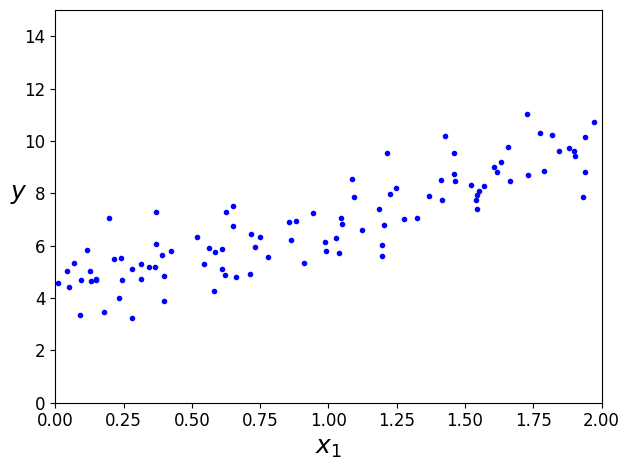

In [7]:
plt.plot(X, y, "b.") # blue(파란색), .(점)으로 표시
plt.xlabel("$x_1$", fontsize=18) # x축과 y축에 라벨 추가
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) # x축은 0에서 2까지, y축은 0에서 15까지 표시하도록 설정
save_fig("generated_data_plot") # 시각화된 이미지 저장
plt.show()

정규 방정식을 사용하여 $\hat{\theta}$ 계산  
산행렬의 역행렬을 계산하기 위해 NumPy의 선형 대수 모듈(np.linalg)의 `inv()` 함수 사용, 행렬 곱셈에는 `dot()` 메서드 사용

In [8]:
X_b = np.c_[np.ones((100, 1)), X] # 행렬 확장, 기존의 X 배열에 𝑥0=1을 추가하여 절편을 고려할 수 있게 함, np.c_는 두 배열을 수평으로 결합하는 함수
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식

 <정규방정식>
 - X_b: 원래의 특성 행렬 X에 1을 추가하여 절편 항(θ0​)을 포함
 - X_b.T: 𝑋𝑏의 전치 행렬
 - X_b.T.dot(X_b): 특성 행렬의 전치와 특성 행렬 내적
 - np.linalg.inv(X_b.T.dot(X_b)): 역행렬
 - X_b.T.dot(y): 입력 데이터의 전치 행렬과 실제 값 𝑦를 내적
 - dot(X_b.T).dot(y): 회귀 계수 벡터 𝜃를 구함

데이터를 생성할 때 사용한 함수는 𝑦=4+3𝑥+가우시안 노이즈

In [9]:
theta_best

array([[4.21509616],
       [2.77011339]])

원래 함수의 파라미터 $\theta_0 = 4$, $\theta_1 = 3$을 기대했지만, 노이즈 때문에 정확한 파라미터를 복원하는 것은 불가(결과는 근사)

이제 구한 $\hat{\theta}$를 이용해 예측을 수행

In [10]:
X_new = np.array([[0], [2]]) # X 값의 범위
X_new_b = np.c_[np.ones((2, 1)), X_new]  # np.ones는 모든 값이 1인 배열을 생성함, 절편을 고려할 수 있게 행렬 확장
y_predict = X_new_b.dot(theta_best) # 정규 방정식에서 구한 회귀 계수 theta_best를 사용해 X_new_b의 예측값을 구함
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


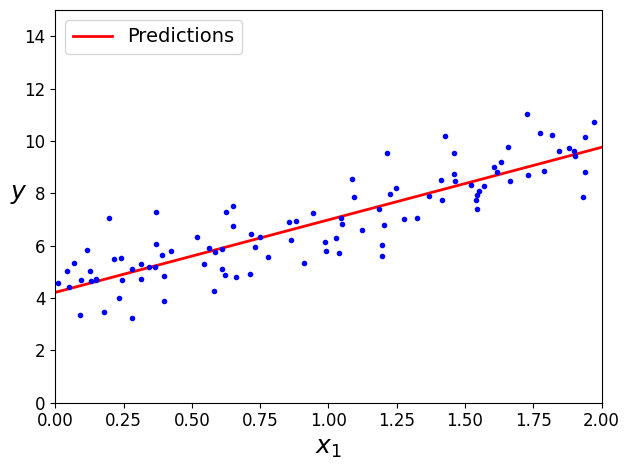

In [11]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") # 빨간색 선("r-")으로 예측값 시각화
plt.plot(X, y, "b.") # 원래의 데이터 점들을 파란색 점("b.")으로 시각화
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14) # 범례 추가
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Scikit-Learn을 사용한 선형 회귀 수행

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [13]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수(최소 제곱)를 기반으로 하며, 이 함수를 직접 호출할 수도 있음

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

함수는 $\hat{\theta}$=$\mathbf{X}^+$y를 계산하며, 여기서 $\mathbf{X}^+$는 𝑋의 의사역행렬(무어-펜로즈 역행렬)  
의사역행렬을 직접 계산하려면 `np.linalg.pinv()`

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

의사역행렬은 SVD(Singular Value Decomposition)라고 불리는 표준 행렬 분해 기법을 사용해 계산  
이 기법은 훈련 세트 행렬 𝑋를 세 개의 행렬 $\mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^\top$의 곱으로 분해(`numpy.linalg.svd()` 참조)

의사역행렬은 $\mathbf{X}^+ = \mathbf{V} \mathbf{\Sigma}^+ \mathbf{U}^\top$로 계산  
행렬 Σ+를 계산할 때 알고리즘은 먼저 Σ에서 아주 작은 임계값보다 작은 값들을 0으로 설정한 다음   
0이 아닌 값들은 모두 그 역수로 대체하고 마지막으로 이 결과 행렬을 전치

정규 방정식 계산보다 효율적, 예외적인 상황도 잘 처리  
정규 방정식은 $\mathbf{X}^\top \mathbf{X}$가 가역(invertible)하지 않을 경우 작동하지 않는데  
(예를 들어 𝑚<𝑛이거나 일부 특성들이 중복될 경우)

의사역행렬은 항상 정의되어 있음!

## Computational Complexity

정규 방정식은 $\mathbf{X}^\top \mathbf{X}$의 역행렬을 계산하는데,  
이 행렬은 (𝑛+1)×(𝑛+1) 크기이며 여기서 𝑛은 특성(feature)의 개수

이러한 행렬의 역을 구하는 계산 복잡도는 구현 방식에 따라 일반적으로 $\mathcal{O}(n^{2.4})$ 에서 $\mathcal{O}(n^3)$

특성 수를 두 배로 늘리면 계산 시간은 대략 $2^{2.4} = 5.3$에서 $2^3 = 8$배 증가

Scikit-Learn의 LinearRegression 클래스에서 사용하는 SVD 기반 방식은 약 $\mathcal{O}(n^2)$  
-> 특성 수를 두 배로 늘리면 계산 시간은 약 4배

정규 방정식과 SVD 방식 모두 특성 수가 매우 많아질 경우(예: 100,000개) 매우 느려짐  
>하지만 이 두 방식 모두 훈련 샘플 수 𝑚에 대해서는 선형 복잡도 O(m)를 가지므로,  
데이터가 메모리에만 들어갈 수 있다면 훈련 샘플 수가 많은 경우도 효율적으로 처리할 수 있음

정규 방정식이든 다른 알고리즘이든 모델 훈련이 끝난 뒤 예측 수행은 매우 빠름  
예측의 계산 복잡도는 예측하려는 샘플 수와 특성 수에 대해 모두 선형  
-> 예측하려는 샘플 수나 특성 수가 두 배로 늘어나면 예측 시간도 대략 두 배로 늘어남

특성 수가 매우 많거나 훈련 샘플이 너무 많아 메모리에 적재할 수 없는 경우에 더 적합한 선형 회귀 모델 훈련 방법은?


# Gradient Descent

경사 하강법(Gradient Descent): 매우 다양한 문제에 대해 최적의 해를 찾을 수 있는 일반적인 최적화 알고리즘  
경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 파라미터를 반복적으로 조정하는 것

짙은 안개 속 산속에서 길을 잃었다고 가정)   
발 아래 땅의 기울기만 느낄 수 있을 때,   
계곡의 바닥으로 빠르게 내려가는 좋은 전략은 가장 가파른 경사의 방향으로 내려가는 것

비용 함수의 현재 위치에서 파라미터 벡터 𝜃에 대한 국소 기울기(gradient)를 측정하고, 하강 방향으로 이동  
기울기가 0이 되는 지점에 도달하면, 그곳이 최소점

구체적으로는, 먼저 𝜃를 무작위 값으로 초기화(랜덤 초기화)  
이후 비용 함수(예: MSE)를 줄이기 위한 아주 작은 단계들을 반복적으로 수행하면서 θ를 점점 더 개선  
이러한 과정은 알고리즘이 최소값에 수렴할 때까지 계속


![4-3](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-3.jpg?raw=1)

모델 파라미터는 무작위로 초기화되며,  
비용 함수를 최소화하기 위해 반복적으로 조정  
학습 단계의 크기는 비용 함수의 기울기에 비례하므로, 파라미터가 최소점에 가까워질수록 단계는 점점 작아짐

경사 하강법에서 중요한 하이퍼파라미터는 **학습률(learning rate)**  
-> 이는 각 단계의 크기를 결정  
학습률이 너무 작으면 알고리즘이 수렴하는 데 많은 반복을 거쳐야 하므로, 학습에 오랜 시간이 걸릴 수 있음

![4-4](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-4.jpg?raw=1)

반면, 학습률이 너무 크면 계곡을 가로질러 반대편으로 튀어 올라가 버릴 수 있으며,  
 심지어 시작한 지점보다 더 높은 곳에 도달할 수도 있음  
 (기울기의 방향을 따라 파라미터를 너무 크게 업데이트하게 되어, 최소값을 지나칠 수 있음)  
이로 인해 알고리즘이 발산하게 되어 값이 점점 더 커지고, 결국 좋은 해를 찾지 못할 수 있음

![4-5](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-5.jpg?raw=1)

모든 비용 함수가 매끄럽고 규칙적인 그릇 모양을 갖는 것은 X  
어떤 비용 함수는 구멍, 능선, 평지 등 다양한 불규칙한 지형을 가지고 있어 최소값에 수렴하기 어렵게 만듦

다음 그림은 경사 하강법이 직면하는 주요 문제를 보여 줌
 - 만약 무작위 초기화가 왼쪽 지점에서 시작된다면, 알고리즘은 전역 최소값보다 덜 좋은 지역 최소값에 수렴
 - 반대로 오른쪽에서 시작된다면, 평지를 가로지르는 데 매우 오랜 시간이 걸릴 수 있음
 - 너무 일찍 중단하면, 전역 최소값에 도달하지 못하게 됨

![4-6](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-6.jpg?raw=1)

선형 회귀 모델의 MSE 비용 함수는 **볼록 함수(convex function)**  
>이는 곡선 위의 임의의 두 점을 이었을 때, 그 선분이 곡선을 가로지르지 않는다는 뜻   
즉, 지역 최소값은 존재하지 않고, 전역 최소값만 존재한다는 의미   
>또한 이 함수는 기울기가 갑자기 변하지 않는 연속적인 함수

-> 학습률이 너무 크지 않고 충분히 오래 반복하면, 경사 하강법은 전역 최소값에 임의로 가까이 수렴하는 것이 보장

실제로 이 비용 함수는 그릇 모양을 하고 있지만, 특성들의 스케일이 매우 다르면 길쭉한 그릇 모양이 될 수 있다.

다음 그림 중 왼쪽은 특성 1과 2가 동일한 스케일을 가질 때의 경사 하강법 모습이고,   
오른쪽은 특성 1의 값이 특성 2보다 훨씬 작을 때의 모습

![4-7](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-7.jpg?raw=1)

왼쪽에서는 경사 하강법 알고리즘이 최소값을 향해 곧장 이동하므로 빠르게 수렴하지만,  
오른쪽에서는 처음에 전역 최소값의 방향과 거의 직각인 방향으로 움직인 후, 거의 평평한 계곡을 따라 오랫동안 이동  
결국에는 최소값에 도달하지만, 그만큼 시간이 많이 걸림

따라서 경사 하강법을 사용할 때는 모든 특성들이 비슷한 스케일을 갖도록 해야 함(예: Scikit-Learn의 `StandardScaler` 클래스 사용)  
그렇지 않으면 수렴까지 훨씬 더 많은 시간이 걸릴 수 있음

모델 학습이란 훈련 세트에 대한 비용 함수를 최소화하는 파라미터 조합을 찾는 것  
이는 모델의 **파라미터 공간(parameter space, 모델의 모든 가능한 파라미터 조합을 나타내는 공간)** 에서의 탐색 과정  
모델이 갖는 파라미터가 많을수록 이 공간의 차원도 높아지고, 탐색이 그만큼 어려워짐

탐색이 어려워지는 이유
- 고차원 공간에서는 **지역 최솟값(local minima)**이나 평평한 구간이 많아 경사 하강법이 빠르게 수렴하지 못하거나 잘못된 지점으로 빠질 가능성이 커짐
- 차원이 높을수록 경사 하강법이 수렴하기 위해 더 많은 계산을 해야 해서 최적화가 더 어려워짐

## Batch Gradient Descent

경사 하강법을 구현하려면, 비용 함수에 대한 각 모델 파라미터 𝜃𝑗에 대한 **기울기(gradient)** 계산해야 함  
다시 말해, 𝜃𝑗 를 아주 조금 바꿨을 때 비용 함수가 얼마나 변하는지를 계산해야 -> **편도함수(partial derivative)**

𝜃𝑗에 대한 비용 함수의 편도함수를 계산하는 식: $\frac{\partial\, \mathrm{MSE}(\boldsymbol{\theta})}{\partial \theta_j}$


$$
\frac{\partial}{\partial \theta_j} \mathrm{MSE}(\boldsymbol{\theta}) = \frac{2}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^\top \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$


이러한 편도함수들을 각각 따로 계산하는 대신, 다음 식을 사용하면 한 번에 계산할 수 있음

$$
\nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
\frac{\partial}{\partial \theta_0} \mathrm{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_1} \mathrm{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_n} \mathrm{MSE}(\boldsymbol{\theta})
\end{pmatrix}
=
\frac{2}{m} \mathbf{X}^\top (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$


$\nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta})$ : 기울기 벡터
> 비용 함수에 대한 모든 편도함수를 담고 있으며, 각각의 모델 파라미터에 대응

이 식은 각 경사 하강법 단계에서 전체 훈련 세트 𝑋에 대한 계산을 포함하고 있음  
-> **배치 경사 하강법(Batch Gradient Descent)**  

매 단계마다 훈련 데이터 전체 배치를 사용하기 때문  
그 결과, 이 방식은 훈련 세트가 매우 클 경우 엄청나게 느림

경사 하강법은 특성 수가 많을수록 상대적으로 잘 확장됨  
수십만 개의 특성이 있을 경우, 선형 회귀 모델을 학습하는 데 정규 방정식이나 SVD 분해를 사용하는 것보다 경사 하강법이 훨씬 빠름

기울기 벡터는 오르막 방향을 가리키므로, 우리는 그 반대 방향으로 내려가야 함  
이는 곧 $\boldsymbol{\theta}$에서 $\nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta})$을 빼는 것을 의미  
이때 학습률 𝜂가 사용  
기울기 벡터에 𝜂를 곱하여 한 단계에서 얼마나 이동할지를 결정

$$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta})
$$


In [16]:
eta = 0.1  # 학습률
n_iterations = 1000 # 경사하강법 1000 번 반복
m = 100 # 훈련 데이터셋 크기

theta = np.random.randn(2,1)  # 파라미터 변수 theta를 무작위 초기화, 2x1 벡터 형태

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 기울기 계산
    theta = theta - eta * gradients # theta를 기울기 방향으로 업데이트

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

적절한 학습률을 찾으려면 그리드 탐색 사용  
 -> 반복 횟수 제한: 그리드 탐색이 수렴하는 데 너무 오래 걸리는 모델 제외

반복 횟수 설정 방법: 너무 적으면 알고리즘이 멈출 때 최적 해에서 멀리 떨어져 있고,   
너무 많으면 모델 매개변수가 더 이상 변하지 않는 동안 시간 ​​낭비

-> 반복 횟수를 매우 크게 설정, 그래디언트 벡터가 아주 작아지면(노름이 작은 숫자 ϵ(허용 오차)보다 작아지면) 알고리즘 중단    
=> 이 상황은 경사 하강법이 (거의) 최소값에 도달했을 때 발생하기 때문

**수렴 속도(Convergence Rate)**  
비용 함수가 볼록(convex)하고 기울기가 갑자기 변하지 않는 경우(예: MSE 비용 함수), 고정된 학습률을 사용하는 배치 경사 하강법은 결국 최적의 해에 수렴하지만
시간이 좀 걸릴 수 있음  
최적의 해에 ϵ 범위 내로 도달하는 데는 O(1/ϵ) 만큼의 반복이 필요할 수 있음  
이 값은 비용 함수의 형태에 따라 달라짐  
더 정밀한 해를 위해 허용 오차를 10배 줄이면, 알고리즘은 약 10배 더 오래 실행될 수 있음

Saving figure gradient_descent_plot


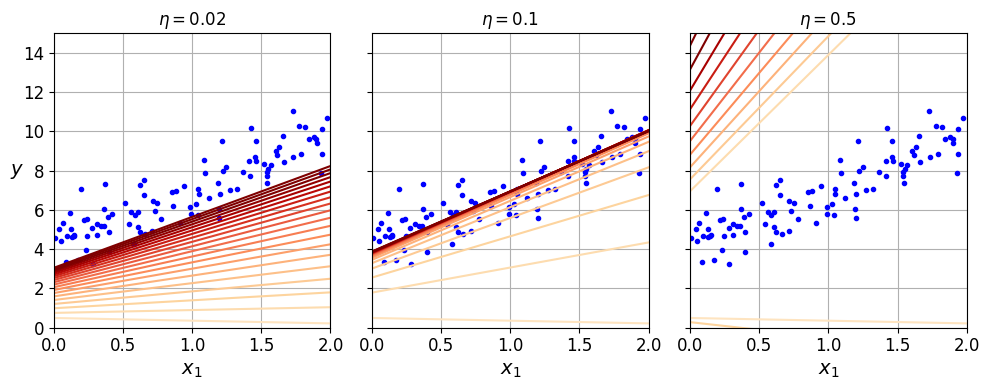

In [18]:
import matplotlib as mpl

# 경사 하강법을 실행하고, 그 진행 과정을 시각화하는 함수
def plot_gradient_descent(theta, eta):
    m = len(X_b)  # 데이터의 크기 (샘플 수)
    plt.plot(X, y, "b.")  # 훈련 데이터(X, y)를 파란색 점으로 플로팅
    n_epochs = 1000  # 경사 하강법의 반복 횟수
    n_shown = 20  # 몇 번의 반복마다 그래프에 결과를 표시할지
    theta_path = []  # 각 반복마다의 theta 값을 저장할 리스트

    # 경사 하강법을 n_epochs만큼 반복
    for epoch in range(n_epochs):
        if epoch < n_shown:  # 처음 20번의 반복에 대해 그래프에 예측 값을 표시
            y_predict = X_new_b @ theta  # 예측 값 계산
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))  # 색상 계산 (그라디언트 색상)
            plt.plot(X_new, y_predict, linestyle="solid", color=color)  # 예측 값 플로팅
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # 기울기 계산 (MSE 비용 함수의 기울기)
        theta = theta - eta * gradients  # 파라미터 업데이트
        theta_path.append(theta)  # 업데이트된 theta 값을 저장

    plt.xlabel("$x_1$")  # x축 레이블
    plt.axis([0, 2, 0, 15])  # x축과 y축의 범위 설정
    plt.grid()  # 그리드 표시
    plt.title(fr"$\eta = {eta}$")  # 그래프 제목 (학습률을 포함)
    return theta_path  # 업데이트된 theta 값을 반환

# 랜덤 초기화된 theta 값 설정
np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

# 그래프의 크기 설정
plt.figure(figsize=(10, 4))

# 첫 번째 서브플롯: 학습률 0.02
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)  # y축 레이블 설정

# 두 번째 서브플롯: 학습률 0.1
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])  # y축의 눈금 레이블 숨기기

# 세 번째 서브플롯: 학습률 0.5
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])  # y축의 눈금 레이블 숨기기
plot_gradient_descent(theta, eta=0.5)

# 그래프를 파일로 저장
save_fig("gradient_descent_plot")

# 그래프 화면에 표시
plt.show()


## Stochastic Gradient Descent

**확률적 경사 하강법 (Stochastic Gradient Descent)**

- 배치 경사 하강법의 주요 문제: 전체 훈련 세트를 사용해 매번 기울기를 계산하는 데 시간이 많이 걸림(훈련 세트가 크면 그만큼 속도가 느려짐)
- 확률적 경사 하강법(Stochastic Gradient Descent, SGD): 훈련 세트에서 무작위로 하나의 샘플 선택, 그 샘플에 대해서만 기울기 계산
- 장점
 - 한 번에 하나의 샘플만 처리하기 때문에 알고리즘이 훨씬 빠르게 동작
 - 매번 처리하는 데이터가 적기 때문에 반복마다 계산이 빠르고, 훈련 세트가 매우 커도 한 번에 하나의 샘플만 메모리에 로드하면 되므로 메모리 효율적(아웃-오브-코어 알고리즘으로 구현, 1장 참조)
- 단점
 - 무작위성(stochastic) 때문에 배치 경사 하강법보다 훨씬 덜 규칙적
 - 비용 함수가 최소값에 도달하기 전에 위아래로 튕기듯이 변하며, 평균적으로는 감소하지만, 한 번 최소값에 근접하더라도 계속해서 튕기기만 하고 안정 X
 - 알고리즘이 종료되면 최종 파라미터 값은 좋지만 최적은 아님

In [19]:
theta_path_sgd = []  # 추가 코드: SGD에서 각 반복마다의 theta 값을 저장할 리스트
                     # 파라미터 공간(parameter space)에서의 변화 시각화를 위해 사용됨


In [24]:
n_epochs = 50
t0, t1 = 5, 50 # 학습률 파라미터 (t0은 학습률이 시작되는 초기 시점 설정, t1은 학습률이 완전히 감소할 때 설정)

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for iteration in range(m):
       random_index = np.random.randint(m)
       xi = X_b[random_index : random_index + 1]
       yi = y[random_index : random_index + 1]
       gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
       eta = learning_schedule(epoch * m + iteration)
       theta = theta - eta * gradients


## Mini-batch Gradient Descent

# Polynomial Regression

# Learning Curves

# Regularized Linear Models

## Ridge Regression

## Lasso Regression

## Elastic Net

## Early Stopping

# Logistic Regression

## Estimating Probabilities

## Training and Cost Function

## Decision Boundaries

## Softmax Regression